# Polynomial Regression using one column

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [43]:
url = "https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Removing columns that are not needed


In [44]:
dataset[' kw_avg_avg']

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
39639    3031.115764
39640    3411.660830
39641    4206.439195
39642    1777.895883
39643    3296.909481
Name:  kw_avg_avg, Length: 39644, dtype: float64

In [45]:
X = X[:, 2:]

In [46]:
X[:, 25]

array([0.0, 0.0, 0.0, ..., 4206.43919512, 1777.89588325, 3296.90948104],
      dtype=object)

In [47]:
X = X[:, 25]

## Splitting the dataset into the Training set and Test set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Variable Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler_test = StandardScaler()
scaler_test.fit(X_test.reshape(-1, 1))
X_test = scaler_test.transform(X_test.reshape(-1, 1))

scaler_train = StandardScaler()
scaler_train.fit(X_train.reshape(-1, 1))
X_train = scaler_train.transform(X_train.reshape(-1, 1))

In [50]:
X_train

array([[ 0.2 ],
       [-0.56],
       [ 1.22],
       ...,
       [ 1.95],
       [-0.35],
       [-0.47]])

In [51]:
X_train.shape

(31715, 1)

## Training the Polynomial Regression model on the dataset


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

X_test = poly_reg.fit_transform(X_test)
y_pred = regressor.predict(X_test)

## Predicting the Test set results

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2532.9    919.  ]
 [ 2744.96  1600.  ]
 [ 2605.13 11700.  ]
 ...
 [ 5178.58 12700.  ]
 [ 2037.69   651.  ]
 [ 3448.53  2200.  ]]


## Evaluating the Model Performance

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.022563116473452438

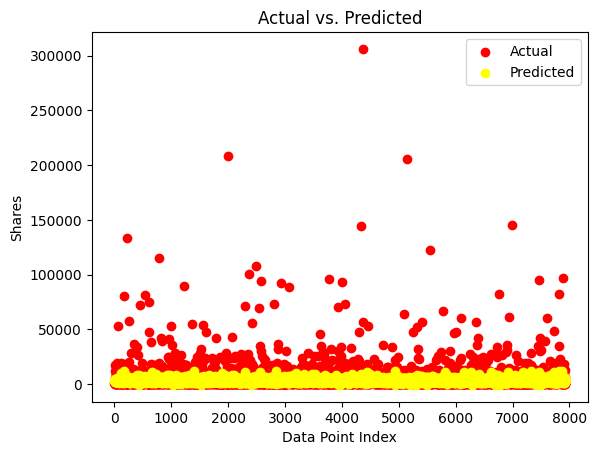

In [64]:
plt.scatter(range(1, len(y_test)+1), y_test, color='red', label='Actual')
plt.scatter(range(1, len(y_test)+1), y_pred, color='yellow', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Shares')
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()